In [1]:
import os, sys
sys.path.insert(1, '../')

import numpy as np
import scipy as sc
import pandas as pd

from importlib import reload
import utils

import matplotlib
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iid-clt-results-011722.csv', index_col=0)
data_df = pd.read_csv('data/ptm_idr.csv')
N = len(data_df)
df

,ptm,n,estimator,mu1-lower,mu1-upper,mu1-coverage,mu1-width,mu0-lower,mu0-upper,mu0-coverage,mu0-width,o-lower,o-upper,o-coverage,o-width
0,p,200,prediction-powered,0.206476,0.294348,True,0.087872,0.052354,0.128437,True,0.076083,1.765703,7.550367,True,5.784664
1,p,200,classical,0.179534,0.342989,True,0.163456,0.046749,0.177971,True,0.131222,1.010704,10.645029,True,9.634325
2,p,200,prediction-powered,0.190239,0.252707,True,0.062469,0.065156,0.145535,True,0.080379,1.379330,4.851915,True,3.472585
3,p,200,classical,0.131808,0.282607,True,0.150799,0.008340,0.104019,False,0.095679,1.307702,46.839681,True,45.531978
4,p,200,prediction-powered,0.181035,0.257648,True,0.076613,0.091610,0.173200,True,0.081590,1.055230,3.441486,True,2.386255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,ub_reg,3000,classical,0.140963,0.559037,True,0.418075,0.160870,0.188123,True,0.027254,0.708173,6.612924,True,5.904751
119996,ub_reg,3000,prediction-powered,0.405460,0.790436,True,0.384976,0.167684,0.188263,True,0.020579,2.940470,18.721742,True,15.781272
119997,ub_reg,3000,classical,0.385297,0.814703,True,0.429407,0.161520,0.188815,True,0.027295,2.692853,22.824273,True,20.131420
119998,ub_reg,3000,prediction-powered,0.465202,0.869612,True,0.404410,0.169920,0.190811,True,0.020891,3.688917,32.580981,True,28.892064


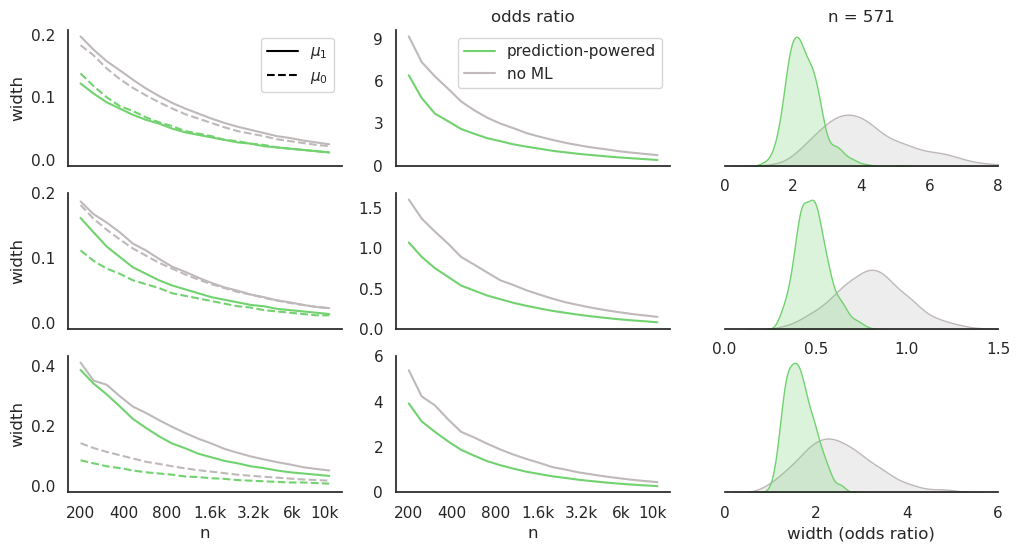

In [28]:
save = True

my_palette = sns.color_palette(["#71D26F", "#BFB9B9",], 2)
sns.set_theme(style="white", palette=my_palette)

ns = np.logspace(np.log10(200), np.log10(N), num=20, base=10).astype(int)
n_hist = ns[5]
ptm_names = ['p', 'ub', 'ac']
fig, axs = plt.subplots(len(ptm_names), 3, figsize=(12, len(ptm_names) * 2))

ns_xticks = [200, 400, 800, 1600, 3200, 6000, 10000]
ns_xticklabels = [200, 400, 800, '1.6k', '3.2k', '6k', '10k']

hist_xlims = [[0, 8], [0, 1.5], [0, 6]]
hist_xticks = [np.arange(0, 9, 2), np.arange(0, 1.6, 0.5), np.arange(0, 7, 2)]

for p_idx, ptm in enumerate(ptm_names):
    
    # ===== left subplots =====
    
    pp_df = df.loc[(df.ptm == ptm) & (df.estimator == 'prediction-powered')]
    cl_df = df.loc[(df.ptm == ptm) & (df.estimator == 'classical')]
    
    # mu1
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['mu1-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['mu1-width'].median()for n in ns])
    axs[p_idx, 0].plot(ns, wpp_n)
    axs[p_idx, 0].plot(ns, wcl_n)
    
    # mu0
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['mu0-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['mu0-width'].median()for n in ns])
    axs[p_idx, 0].plot(ns, wpp_n, c=my_palette[0], linestyle='--')     
    axs[p_idx, 0].plot(ns, wcl_n, c=my_palette[1], linestyle='--')
    
    axs[p_idx, 0].set_xscale('log');
    axs[p_idx, 0].set_xticks([])
    axs[p_idx, 0].set_ylabel('width');
    sns.despine(ax=axs[p_idx, 0], top=True, right=True)
    
    axs[p_idx, 0].plot([0, 0], [0, 0], linestyle='-', c='k', label='$\mu_1$')
    axs[p_idx, 0].plot([0, 0], [0, 0], linestyle='--', c='k', label='$\mu_0$')
    
    # ===== middle subplots =====
    
    # odds ratio
    wcl_n = np.array([cl_df.loc[cl_df.n == n]['o-width'].median()for n in ns])
    wpp_n = np.array([pp_df.loc[pp_df.n == n]['o-width'].median()for n in ns])
    axs[p_idx, 1].plot(ns, wpp_n, label='prediction-powered')
    axs[p_idx, 1].plot(ns, wcl_n, label='no ML')
    
    sns.despine(ax=axs[p_idx, 1], top=True, right=True)
    axs[p_idx, 1].set_xscale('log');
    axs[p_idx, 1].set_xticks([])
    
    # ===== right subplots
    
    hist_df = df.loc[(df.ptm == ptm) & (df.n == n_hist)]
    kde = sns.kdeplot(data=hist_df, x='o-width', hue='estimator', ax=axs[p_idx, 2], fill=True);
    sns.despine(ax=axs[p_idx, 2], top=True, right=True, left=True)
    axs[p_idx, 2].set_yticks([])
    axs[p_idx, 2].set_ylabel('')
    axs[p_idx, 2].set_xlim(hist_xlims[p_idx])
    axs[p_idx, 2].set_xticks(hist_xticks[p_idx])
    axs[p_idx, 2].set_xlabel('width (odds ratio)')
    kde.get_legend().remove()
    
for i in [0, 1]:
    axs[-1, i].set_xticks(ns_xticks)
    axs[-1, i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axs[-1, i].set_xticklabels(ns_xticklabels)
    axs[-1, i].set_xlabel('n');
    axs[0, i].legend();
    axs[0, i].legend();
axs[0, 0].set_yticks([0, 0.1, 0.2])
axs[1, 0].set_yticks([0, 0.1, 0.2])
axs[2, 0].set_yticks([0, 0.2, 0.4])
axs[0, 1].set_yticks(np.arange(0, 10, 3))
axs[1, 1].set_yticks(np.arange(0, 1.7, 0.5))
axs[2, 1].set_yticks(np.arange(0, 7, 2))
axs[0, 1].set_title('odds ratio');
axs[0, 2].set_title('n = {}'.format(n_hist));

if save:
    plt.savefig('./figures/widths.pdf', dpi=300, bbox_inches='tight')
plt.show()

Compute true odds ratio and naive confidence interval

In [34]:
alpha = 0.1
grid = np.arange(1e-3, 1, step=1e-3)
for ptm in ptm_names:
    n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
    n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
    n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
    n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
    o = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)
    print('{}\n  True odds ratio: {:.4f} (N = {})'.format(ptm, o, len(data_df.loc[(data_df[ptm] == 1)])))
    
    # naive CI
    y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
    y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
    mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
    mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)
    
    o_naive_ci = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)
    print('  Naive: [{:.4f}, {:.4f}]'.format(o_naive_ci[0], o_naive_ci[1]))

p
  True odds ratio: 2.1309 (N = 6017)
  Naive: [2.8813, 2.9369]
ub
  True odds ratio: 0.3951 (N = 3738)
  Naive: [0.2746, 0.2809]
ac
  True odds ratio: 0.8933 (N = 1171)
  Naive: [0.6905, 0.9483]


In [4]:
df.n.unique()

array([ 200,  270,  365,  493,  666,  900, 1216, 1643, 2220, 3000])

In [35]:
ptm = 'p'
n = df.n.unique()[2]
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]

# find example
idx = np.where(
    (cl_df['o-width'].to_numpy() > 2.5 * pp_df['o-width'].to_numpy())
    & (pp_df['o-coverage'].to_numpy())
#     & (pp_df['o-upper'].to_numpy() > 1)
    & (pp_df['o-lower'].to_numpy() > 1.2)
    & (cl_df['o-lower'].to_numpy() < 0.9)
#     & (cl_df['o-upper'].to_numpy() > 1.2)
)[0]
print(idx.size)
for i in idx:
    print(i)
    print(cl_df.iloc[i])
    print(pp_df.iloc[i])
    print()

2
197
ptm                     p
n                     365
estimator       classical
mu1-lower        0.133534
mu1-upper        0.240851
mu1-coverage         True
mu1-width        0.107317
mu0-lower        0.057745
mu0-upper        0.152132
mu0-coverage         True
mu0-width        0.094387
o-lower          0.858909
o-upper          5.176996
o-coverage           True
o-width          4.318087
Name: 4395, dtype: object
ptm                              p
n                              365
estimator       prediction-powered
mu1-lower                 0.173216
mu1-upper                 0.227696
mu1-coverage                  True
mu1-width                  0.05448
mu0-lower                 0.090984
mu0-upper                 0.146535
mu0-coverage                  True
mu0-width                 0.055551
o-lower                    1.22023
o-upper                   2.945609
o-coverage                    True
o-width                    1.72538
Name: 4394, dtype: object

918
ptm                   

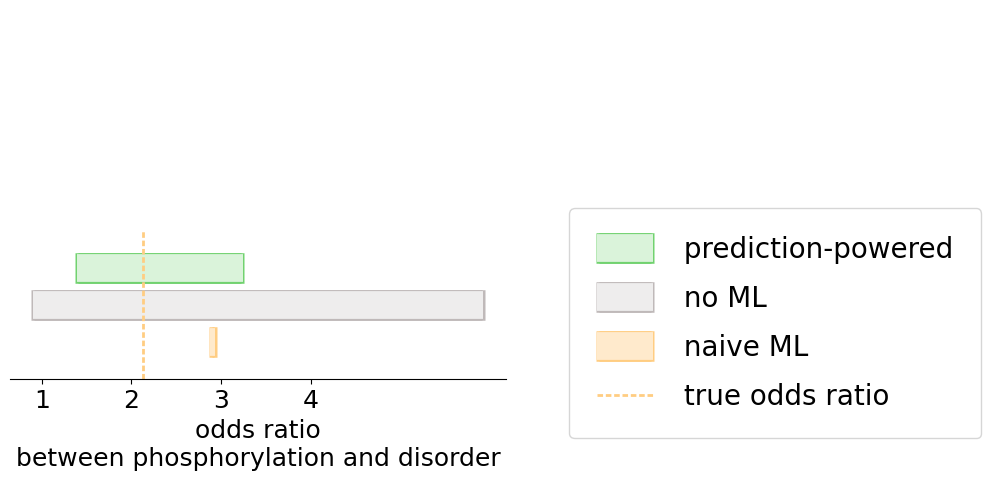

In [37]:
ptm = 'p'
n = df.n.unique()[2]
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]
trial = 918
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)

# naive CI
alpha = 0.1
grid = np.arange(1e-3, 1, step=1e-3)
y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)
o_naive_ci = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)

ci_pp = [pp_df.iloc[trial]['o-lower'], pp_df.iloc[trial]['o-upper']]
ci_cl = [cl_df.iloc[trial]['o-lower'], cl_df.iloc[trial]['o-upper']]

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.3,0.3],
    linewidth=20, color="#DAF3DA", solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#71D26F"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#71D26F"),
        pe.Normal()
    ],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED",
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#BFB9B9"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#BFB9B9"),
        pe.Normal()
    ],
    label=' no ML'
)
plt.plot(
    o_naive_ci, [0.1, 0.1],
    linewidth=20, color="#FFEACC", 
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#FFCD82"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#FFCD82"),
        pe.Normal()
    ],
    label=' naive ML',  
)


plt.plot(
    [theta_star, theta_star], [0, 0.4], linestyle='--', dashes=(2, 1), linewidth=2,
    label=" true odds ratio", color="#FFCD82"
)

plt.xlabel("odds ratio\nbetween phosphorylation and disorder", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(range(1, 5), fontsize=18)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)

if save:
    plt.savefig('./figures/intervals-{}.pdf'.format(ptm), ppi=300, bbox_inches='tight')
plt.show()

/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppi" which is no longer supported as of 3.3 and will become an error in 3.6


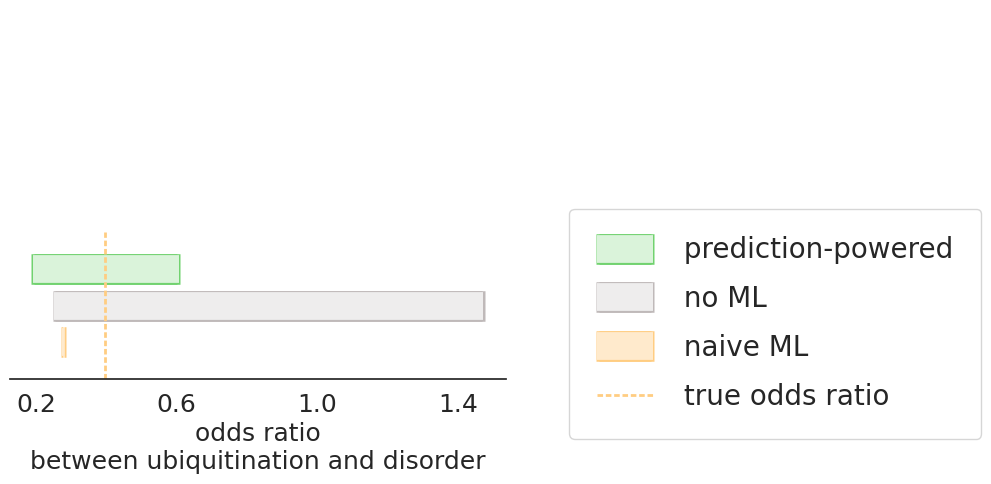

In [55]:
ptm = 'ub'
n = df.n.unique()[5]
tmp = df.loc[(df.ptm == ptm) & (df.n == n)]
cl_df = tmp[1::2]
pp_df = tmp[0::2]
trial = 149
save = True

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)

# naive CI
alpha = 0.1
grid = np.arange(1e-3, 1, step=1e-3)
y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)
o_naive_ci = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)

ci_pp = [pp_df.iloc[trial]['o-lower'], pp_df.iloc[trial]['o-upper']]
ci_cl = [cl_df.iloc[trial]['o-lower'], cl_df.iloc[trial]['o-upper']]

plt.figure(figsize=(6.4,4.8))
plt.plot(
    ci_pp,[0.3,0.3],
    linewidth=20, color="#DAF3DA", solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#71D26F"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#71D26F"),
        pe.Normal()
    ],
    label=' prediction-powered'
)
plt.plot(
    ci_cl, [0.2, 0.2],
    linewidth=20, color="#EEEDED",
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#BFB9B9"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#BFB9B9"),
        pe.Normal()
    ],
    label=' no ML'
)
plt.plot(
    o_naive_ci, [0.1, 0.1],
    linewidth=20, color="#FFEACC", 
    solid_capstyle='butt',
    path_effects=[
        pe.Stroke(linewidth=22, offset=(-1, 0), foreground="#FFCD82"),
        pe.Stroke(linewidth=22, offset=(1, 0), foreground="#FFCD82"),
        pe.Normal()
    ],
    label=' naive ML',  
)


plt.plot(
    [theta_star, theta_star], [0, 0.4], linestyle='--', dashes=(2, 1), linewidth=2,
    label=" true odds ratio", color="#FFCD82"
)

plt.xlabel("odds ratio\nbetween ubiquitination and disorder", fontsize=18)
plt.yticks([], labels=[])
plt.xticks(np.arange(0.2, 1.5, 0.4), fontsize=18)
plt.ylim([0,1])
leg = plt.legend(fontsize=20, borderpad=1, labelspacing = 0.75, bbox_to_anchor=[1.1,0.5])
sns.despine(ax=plt.gca(),top=True,right=True,left=True)

if save:
    plt.savefig('./figures/intervals-{}.pdf'.format(ptm), ppi=300, bbox_inches='tight')
plt.show()

## 03.01 Science submission plots

In [22]:
ptm = 'ac'
ns = df.n.unique()
n = ns[1]

pp_df = df.loc[(df.ptm == ptm) & (df.estimator == 'prediction-powered')]
cl_df = df.loc[(df.ptm == ptm) & (df.estimator == 'classical')]
wcl_n = np.array([cl_df.loc[cl_df.n == n]['o-width'].median()for n in ns])
wpp_n = np.array([pp_df.loc[pp_df.n == n]['o-width'].median()for n in ns])

ppn_df = pp_df.loc[pp_df.n == n]
cln_df = cl_df.loc[cl_df.n == n]
lower_endpoints = np.hstack([ppn_df['o-lower'][:, None], cln_df['o-lower'][:, None]])
upper_endpoints = np.hstack([ppn_df['o-upper'][:, None], cln_df['o-upper'][:, None]])



/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/home/clarafy/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]


In [23]:
alpha = 0.1

# true odds ratio
n_z1_y1 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['disordered'] == 1)])
n_z0_y1 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['disordered'] == 1)])
n_z1_y0 = len(data_df.loc[(data_df[ptm] == 1) & (data_df['ordered'] == 1)])
n_z0_y0 = len(data_df.loc[(data_df[ptm] == 0) & (data_df['ordered'] == 1)])
theta_star = (n_z1_y1 / n_z0_y1) / (n_z1_y0 / n_z0_y0)

# naive CI
grid = np.arange(1e-3, 1, step=1e-3)
y_z1_n = (data_df.loc[data_df[ptm] == 1]['pred_disordered'].to_numpy() >= 0.5).astype(int)
y_z0_n = (data_df.loc[data_df[ptm] == 0]['pred_disordered'].to_numpy() >= 0.5).astype(int)
mu1_naive_ci = utils.wsr_iid(y_z1_n, alpha / 2, grid)
mu0_naive_ci = utils.wsr_iid(y_z0_n, alpha / 2, grid)

C_imputed = utils.get_odds_ratio_ci_from_mu_ci(mu1_naive_ci, mu0_naive_ci)

In [5]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

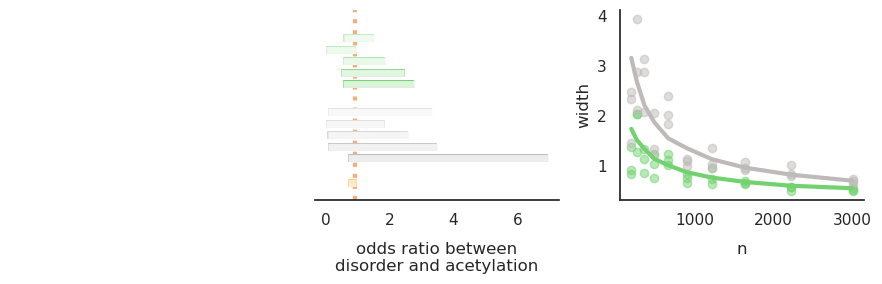

In [28]:
# Make plot
ptm2label = {
    'p': 'phosphorylation',
    'ub': 'ubiquitination',
    'ac': 'acetylation'
}
num_intervals = 5
num_trials = len(ppn_df)
save = True
save_fname = './science-sub-{}.pdf'.format(ptm)

pp_intervals = []
classical_intervals = []
for i in range(num_intervals):
    trial_idx = np.random.choice(num_trials)
    
    pp_intervals += [
        [lower_endpoints[trial_idx,0], upper_endpoints[trial_idx,0]]
    ]
    
    classical_intervals += [
        [lower_endpoints[trial_idx,1], upper_endpoints[trial_idx,1]]
    ]

xlim = [None, None]
ylim = [0,1.15]
linewidth = 5
linewidth_modifier = 1.1
offset = 0.25
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(9,3))
sns.set_theme(style="white", font_scale=1, font="DejaVu Sans")
axs[1].axvline(theta_star, ymin=0.0, ymax=1, linestyle="dotted", linewidth=3, label="frequency of spiral galaxies", color="#F7AE7C")

for i in reversed(range(num_intervals)):
    pp_interval = pp_intervals[i]
    classical_interval = classical_intervals[i]
    
    if i == 0:
        axs[1].plot([pp_interval[0], pp_interval[1]],[0.7, 0.7], linewidth=linewidth, color="#DAF3DA", path_effects=[pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(-offset,0), foreground="#71D26F"), pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(offset,0), foreground="#71D26F"), pe.Normal()], label=' prediction-powered', solid_capstyle="butt")
        axs[1].plot([classical_interval[0], classical_interval[1]],[0.25,0.25], linewidth=linewidth, color="#EEEDED", path_effects=[pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(-offset,0), foreground="#BFB9B9"), pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(offset,0), foreground="#BFB9B9"), pe.Normal()], label=' classical', solid_capstyle="butt")
        axs[1].plot([C_imputed[0], C_imputed[1]],[0.1, 0.1], linewidth=linewidth, color="#FFEACC", path_effects=[pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(-offset,0), foreground="#FFCD82"), pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(offset,0), foreground="#FFCD82"), pe.Normal()], label=' imputed', solid_capstyle="butt")
    else:
        lighten_factor = 0.8/np.sqrt(i)
        yshift = i*0.07
        axs[1].plot([pp_interval[0], pp_interval[1]],[0.7 + yshift, 0.7 + yshift], linewidth=linewidth, color=lighten_color("#DAF3DA", lighten_factor), path_effects=[pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(-offset,0), foreground=lighten_color("#71D26F", lighten_factor)), pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(offset,0), foreground=lighten_color("#71D26F", lighten_factor)), pe.Normal()], solid_capstyle="butt")
        axs[1].plot([classical_interval[0], classical_interval[1]],[0.25 + yshift,0.25 + yshift], linewidth=linewidth, color=lighten_color("#EEEDED", lighten_factor), path_effects=[pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(-offset,0), foreground=lighten_color("#BFB9B9", lighten_factor)), pe.Stroke(linewidth=linewidth * linewidth_modifier, offset=(offset,0), foreground=lighten_color("#BFB9B9", lighten_factor)), pe.Normal()], solid_capstyle="butt")


axs[1].set_xlabel("odds ratio between\ndisorder and {}".format(ptm2label[ptm]), labelpad=10)
axs[1].set_yticks([])
axs[1].set_yticklabels([])
axs[1].set_ylim(ylim)
axs[1].set_xlim(xlim)

sns.despine(ax=axs[1],top=True,right=True,left=True)

axs[2].plot(ns, wpp_n, label="prediction-powered", color="#71D26F", linewidth=3)
num_scatter = 3
rand_idx_scatter = [np.random.choice(num_trials, size=num_scatter).astype(int) for n in ns]

scatter_xs = np.concatenate([np.concatenate([[ns[j]] * num_scatter]) for j in range(ns.shape[0])])
scatter_ys = np.concatenate([pp_df.loc[pp_df.n == n]['o-width'].to_numpy()[js] for js, n in zip(rand_idx_scatter, ns)])
axs[2].scatter(
    scatter_xs,
    scatter_ys,
    color="#71D26F",
    alpha=0.5
)
    
axs[2].plot(ns, wcl_n, label="classical", color="#BFB9B9", linewidth=3)
scatter_ys = np.concatenate([cl_df.loc[cl_df.n == n]['o-width'].to_numpy()[js] for js, n in zip(rand_idx_scatter, ns)])
axs[2].scatter(
    scatter_xs,
    scatter_ys,
    color="#BFB9B9",
    alpha=0.5
)

axs[2].locator_params(axis='y', tight=None, nbins=6)
axs[2].set_ylabel("width")
axs[2].set_xlabel("n",  labelpad=10)
sns.despine(ax=axs[2],top=True, right=True)

sns.despine(ax=axs[0],top=True, right=True, left=True, bottom=True)
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

plt.tight_layout()
if save: 
    plt.savefig(save_fname)
plt.show()
